In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Cars93.csv')

In [5]:
def model(x, coefs, intercept):
    y = np.zeros(len(x))
    p = len(coefs)
    y+=intercept
    for i in range(p):
        y += coefs[i] * x[:,i]
    return y

    
def mse(y_a, y_b):
    d = (y_a - y_b)**2
    return d.mean()

def cross_validation(X, Y,coefs, intercept, n_groups=2):
    n_points = len(Y)
    ids = np.arange(n_points)
    group_ids = ids % n_groups
    mse_groups = np.zeros(n_groups)
    for i in range(n_groups):
        ii = (group_ids ==i)
        validation_X = X[ii]
        train_X = X[~ii]
        
        validation_Y = Y[ii]
        train_Y = Y[~ii]
        
        Y_model = model(validation_X, coefs, intercept)
        mse_groups[i] = mse(Y_model, validation_Y)
        
    return mse_groups.mean()

In [7]:
X = np.array(data[['MPG.city', 'MPG.highway', 'EngineSize',    'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']],dtype=float)
Y = np.array(data['Price'].values.reshape(-1,1),dtype=float)
print(X)

[[2.500e+01 3.100e+01 1.800e+00 ... 6.800e+01 3.700e+01 2.705e+03]
 [1.800e+01 2.500e+01 3.200e+00 ... 7.100e+01 3.800e+01 3.560e+03]
 [2.000e+01 2.600e+01 2.800e+00 ... 6.700e+01 3.700e+01 3.375e+03]
 ...
 [1.800e+01 2.500e+01 2.800e+00 ... 6.600e+01 3.600e+01 2.810e+03]
 [2.100e+01 2.800e+01 2.300e+00 ... 6.700e+01 3.700e+01 2.985e+03]
 [2.000e+01 2.800e+01 2.400e+00 ... 6.900e+01 3.800e+01 3.245e+03]]


In [8]:
from sklearn import linear_model

# Prueba de Lasso con alpha=0.1
clf = linear_model.Lasso(alpha=0.1,normalize=True)
clf.fit(X, Y)
coefs=clf.coef_
intercept=clf.intercept_
print(clf.coef_)
print(clf.intercept_)  

[-0.         -0.02787334  0.          0.11794716  0.          0.
  0.         -0.          0.          0.11283772 -0.         -0.
  0.        ]
[-8.37275355]


In [9]:
print(model(X,coefs,intercept))

[18.78522288 27.49618303 22.69889879 23.15024967 27.62336728 15.58532118
 23.42279725 25.25007751 23.11215744 27.38334531 38.24981255 14.99460357
 15.2760257  21.11494843 15.97958102 23.44932626 23.0560482  24.04273254
 37.14698256 21.64337094 19.21246551 20.65292149 12.61666153 12.73326435
 14.40450521 20.42822785 14.51734293 37.28769362 12.61666153 28.83814782
  8.29349207 16.82843224 13.48136569 14.59998118 15.97725489 21.59980672
 19.2644471  26.17600034  7.21458107 12.18430945 20.91849068 13.99796827
 19.34941148 10.86789187 16.50246409 12.13743731 17.70702575 36.55400626
 24.4007963  29.48506929 22.07339688 28.87345674 11.21285881 13.83046028
 21.64517245 21.65224548 31.83936026 18.00001111 28.93709618 13.41683908
 20.16580452 12.61666153 26.85724894 14.51403501 20.10540556 21.43400562
 21.50920828 20.66726803 15.58532118 23.44932626 23.42279725 12.58744384
 10.38346357 15.1339703  21.11494843 26.6505723  23.42279725 18.58607644
 12.10301555  9.36147031 12.35154952 17.6336246   9

[49.49280487]
[49.49294678]
[49.49312766]
[49.49337775]
[49.49370889]
[49.49414881]
[49.4947316]
[49.49539643]
[49.4962098]
[49.4973036]
[49.49875282]
[49.50068524]
[49.50324439]
[49.50664185]
[49.51374161]
[49.51990191]
[49.52821438]
[49.53912821]
[49.55347433]
[49.57236455]
[49.597269]
[49.63014903]
[49.67359021]
[49.73090233]
[49.80682751]
[49.76045532]
[49.28432145]
[48.62245314]
[47.8624161]
[47.13919562]
[44.21559363]
[40.00574594]
[34.42011811]
[27.07574922]
[17.37807928]
[4.99121062]
[-9.42711055]
[-22.5873383]
[-20.53067764]
[-20.89955317]
[-21.09061048]
[-21.4100491]
[-22.06045975]
[-22.9169076]
[-24.05280809]
[-25.56289928]
[-27.56335084]
[-30.21802417]
[-34.22761548]
[-41.34503471]


Text(0.5, 0, '$\\lambda$')

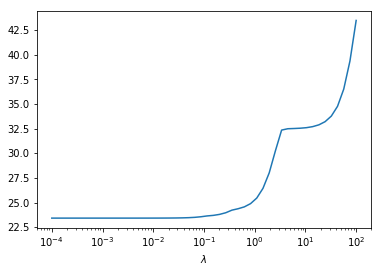

In [103]:

alpha=np.logspace(-4,2)
cross_val_error=np.zeros(len(alpha))

npar=len(X[1,:])+1
all_coef=np.zeros((len(alpha),npar))

for i in range(len(alpha)):
    clf = linear_model.Lasso(alpha=alpha[i])
    clf.fit(X, Y)
    coefs=clf.coef_
    intercept=clf.intercept_
    SV_leave_one_out  = cross_validation(X, Y,coefs, intercept, n_groups=len(X))
    cross_val_error[i]=SV_leave_one_out
    all_coef[i,0]=intercept
    all_coef[i,1:]=coefs
    print(intercept)
plt.plot(alpha,cross_val_error)
plt.xscale('log')
plt.xlabel("$\lambda$")


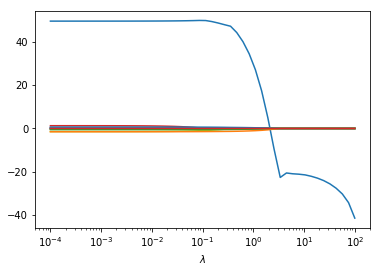

In [106]:
plt.plot(alpha,all_coef)
plt.xlabel("$\lambda$")
plt.xscale('log')